# Exploratory Data Analysis - Sports

As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
Suggest teams or players a company should endorse for its products. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the datasets 
matches = pd.read_csv("matches.csv")
#deliveries = pd.read_csv("deliveries.csv")

In [3]:
matches.head()

season       city      date                        team1  \
0    2017  Hyderabad  4/5/2017          Sunrisers Hyderabad   
1    2017       Pune  4/6/2017               Mumbai Indians   
2    2017     Rajkot  4/7/2017                Gujarat Lions   
3    2017     Indore  4/8/2017       Rising Pune Supergiant   
4    2017  Bangalore  4/8/2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
matches.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [5]:
matches.shape

(756, 17)

In [6]:
matches.drop(['umpire3'],inplace=True,axis=1)


In [7]:
matches[pd.isnull(matches.city)]

season city       date                        team1  \
461    2014  NaN  4/19/2014               Mumbai Indians   
462    2014  NaN  4/19/2014        Kolkata Knight Riders   
466    2014  NaN  4/23/2014          Chennai Super Kings   
468    2014  NaN  4/25/2014          Sunrisers Hyderabad   
469    2014  NaN  4/25/2014               Mumbai Indians   
474    2014  NaN  4/28/2014  Royal Challengers Bangalore   
476    2014  NaN  4/30/2014          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462             Delhi Daredevils        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468             Delhi Daredevils          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0             Delhi Daredevils            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2  
461        Aleem Dar    AK Chaudhary  
462        Aleem Dar     VA Kulkarni  
466  HDPK Dharmasena  RK Illingworth  
468        M Erasmus          S Ravi  
469        BF Bowden       M Erasmus  
474        BF Bowden          S Ravi  
476  HDPK Dharmasena       M Erasmus

In [9]:
matches.at[[461,462,466,468,474,476],'city'] = 'Abu Dhabi'
matches.at[469,'city'] = 'Sharjah'
matches.winner.fillna('Draw',inplace=True)
matches.player_of_match.fillna('No',inplace=True)

#matches[pd.isnull(matches.umpire1)]
matches.at[4,'umpire1'] =  'Sundaram Ravi' 
matches.at[4,'umpire2'] =  'Virender Sharma' 

matches.at[753,'umpire1'] =  'Bruce Oxenford' 
matches.at[753,'umpire2'] =  'Sundaram Ravi' 

matches.loc[matches['team1']=='Rising Pune Supergiant','team1'] = 'Rising Pune Supergiants'
matches.loc[matches['team2']=='Rising Pune Supergiant','team2'] = 'Rising Pune Supergiants'

<AxesSubplot:xlabel='season,team1'>

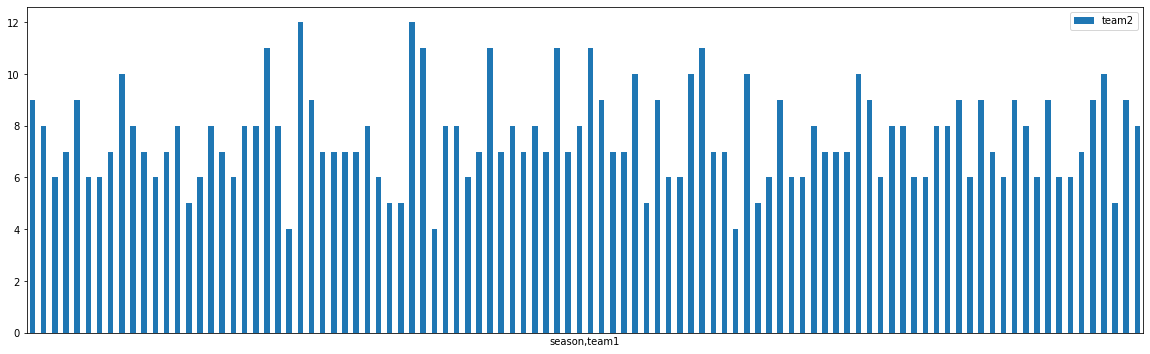

In [10]:
matches[['season','team1','team2']].groupby(['season','team1']).count().plot(kind="bar",figsize=(20,6),xticks=())

In [11]:
matches[['season','city','winner','venue','player_of_match']].groupby('season').tail(1).sort_values(by='season')
#['winner'].value_counts().plot(kind="bar",figsize=(8,5),yticks=range(1,5),alpha=0.8,legend='No. of Season Winner')

season          city                 winner  \
116    2008        Mumbai       Rajasthan Royals   
173    2009  Johannesburg        Deccan Chargers   
233    2010        Mumbai    Chennai Super Kings   
306    2011       Chennai    Chennai Super Kings   
380    2012       Chennai  Kolkata Knight Riders   
456    2013       Kolkata         Mumbai Indians   
516    2014     Bangalore  Kolkata Knight Riders   
575    2015       Kolkata         Mumbai Indians   
635    2016     Bangalore    Sunrisers Hyderabad   
58     2017     Hyderabad         Mumbai Indians   
695    2018        Mumbai    Chennai Super Kings   
755    2019     Hyderabad         Mumbai Indians   

                                         venue player_of_match  
116                 Dr DY Patil Sports Academy       YK Pathan  
173                      New Wanderers Stadium        A Kumble  
233                 Dr DY Patil Sports Academy        SK Raina  
306            MA Chidambaram Stadium, Chepauk         M Vijay  
380            MA Chidambaram Stadium, Chepauk        MS Bisla  
456                               Eden Gardens      KA Pollard  
516                      M Chinnaswamy Stadium       MK Pandey  
575                               Eden Gardens       RG Sharma  
635                      M Chinnaswamy Stadium     BCJ Cutting  
58   Rajiv Gandhi International Stadium, Uppal       KH Pandya  
695                           Wankhede Stadium       SR Watson  
755         Rajiv Gandhi Intl. Cricket Stadium       JJ Bumrah

In [12]:
df = matches[['season','team1','team2','toss_winner','toss_decision','winner','venue']]

In [13]:
df.head()

season                        team1                        team2  \
0    2017          Sunrisers Hyderabad  Royal Challengers Bangalore   
1    2017               Mumbai Indians      Rising Pune Supergiants   
2    2017                Gujarat Lions        Kolkata Knight Riders   
3    2017      Rising Pune Supergiants              Kings XI Punjab   
4    2017  Royal Challengers Bangalore             Delhi Daredevils   

                   toss_winner toss_decision                       winner  \
0  Royal Challengers Bangalore         field          Sunrisers Hyderabad   
1       Rising Pune Supergiant         field       Rising Pune Supergiant   
2        Kolkata Knight Riders         field        Kolkata Knight Riders   
3              Kings XI Punjab         field              Kings XI Punjab   
4  Royal Challengers Bangalore           bat  Royal Challengers Bangalore   

                                       venue  
0  Rajiv Gandhi International Stadium, Uppal  
1    Maharashtra Cricket Association Stadium  
2     Saurashtra Cricket Association Stadium  
3                     Holkar Cricket Stadium  
4                      M Chinnaswamy Stadium

In [9]:
data = list()
for year1 in df.season.unique():    
    for team in df.team1.unique():
        win = df.winner[(df['winner']==team) & (df.season == year1)].count()
        loss = df.winner[(df.season == year1) & ((df['team1']==team) | (df['team2']==team)) & (df['winner']!=team)].count()
        if win!=0 and loss!=0:
            data.append({'season': year1,'team': team,'win':win,'loss':loss})
winlossData = pd.DataFrame(data)

In [ ]:

#sns.barplot(x='team',y='loss',data=winlossData)
#sns.barplot(x='team',y='win',data=winlossData)
plt.figure(figsize=(15,20))   
    
n = round(len(winlossData.season.unique())/2)
i=1
season = [year for year in winlossData.season.unique()]

for year1 in sorted(season):  
    plt.subplot(n, 2, i)
    plt.title("IPL Season: "+ str(year1))    
    plt.tight_layout()
    team = winlossData.loc[(winlossData.season==year1), 'team'].to_list()
    win = winlossData.loc[(winlossData.season==year1), 'win'].to_list()
    loss = winlossData.loc[(winlossData.season==year1), 'loss'].to_list()
    plt.bar(team,win,width=0.4)
    plt.bar(team,loss,width=0.4)
    plt.xticks(rotation=15)
    plt.legend(["win","loss"])
    i+=1   

In [ ]:
#plt.figure(figsize=(15,10))   

team = winlossData.loc[(winlossData.season==2008), 'team'].to_list()
win = winlossData.loc[(winlossData.season==2008), 'win'].to_list()
loss = winlossData.loc[(winlossData.season==2008), 'loss'].to_list()
winclrs = ['#b2b2b2' if x != 'Rajasthan Royals' else '#ff4c4c' for x in team ]
lossclrs = ['#666666' if x != 'Rajasthan Royals' else '#ff3232' for x in team ]
plt.bar(team,win,color=winclrs)
plt.bar(team,loss,color=lossclrs)
ymax = max(win)
xpos = win.index(max(win))
xmax = team[xpos]
plt.annotate("Champion",xy=(xmax,ymax),xytext=(xmax, ymax-5),weight='bold',rotation='vertical',ha='center',va='top',size=15,color='#FFF')

plt.legend(["win","loss"])
#barlist


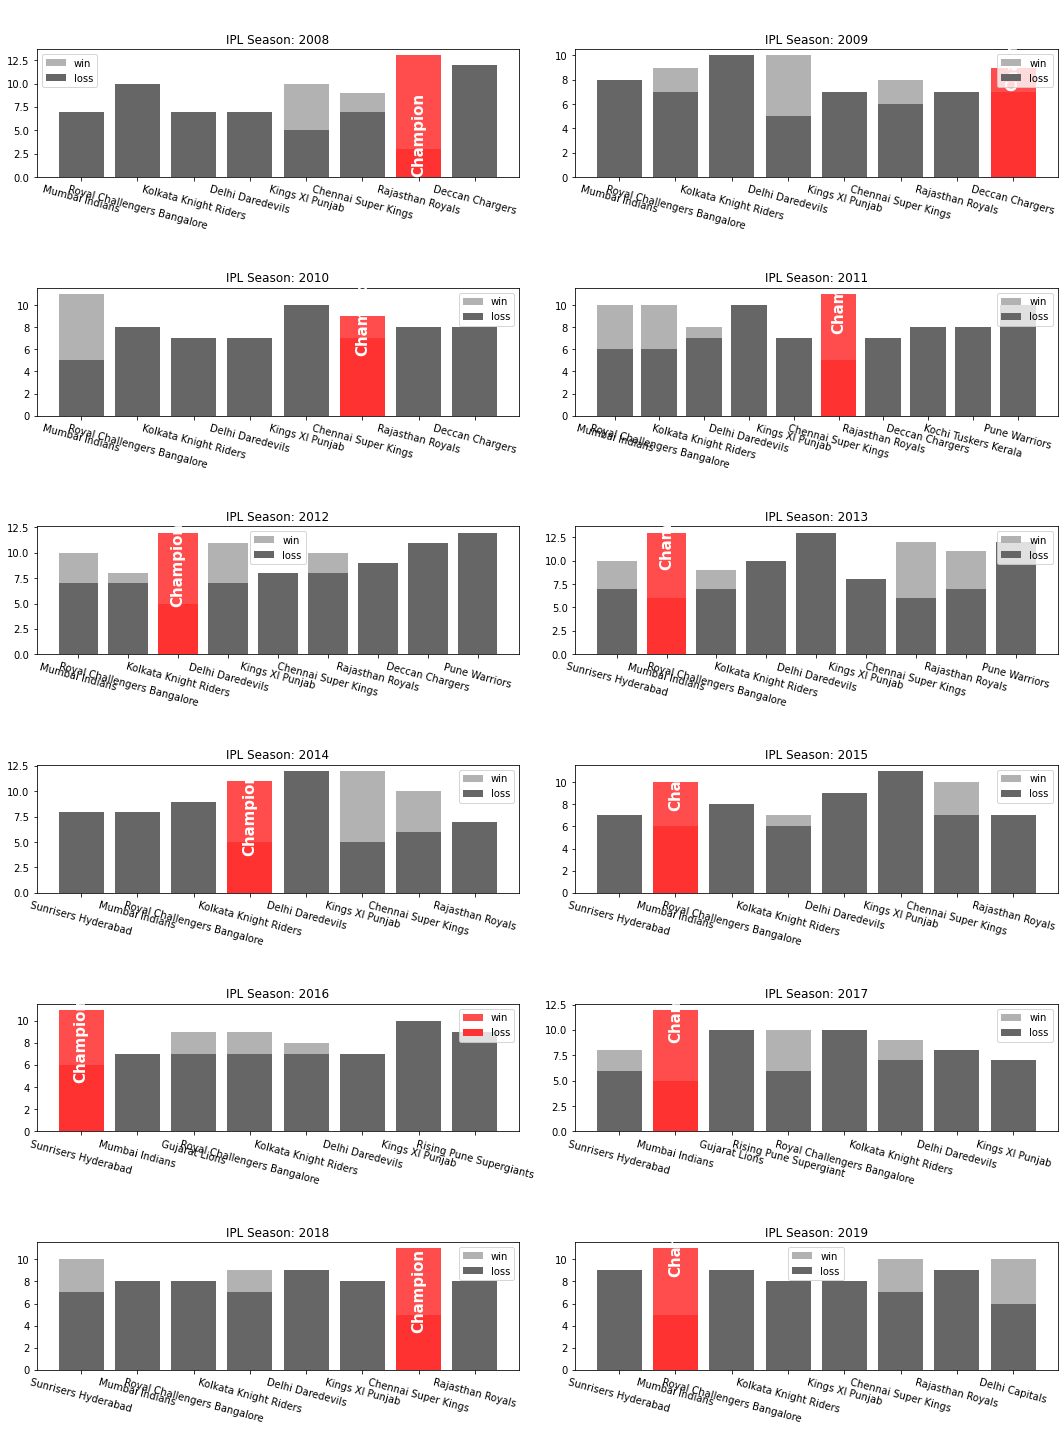

In [48]:
file = matches[['season','winner']].groupby('season').tail(1).sort_values(by='season')
plt.figure(figsize=(15,20))
n = round(len(winlossData.season.unique())/2)
j,i=0,1
season = [year for year in winlossData.season.unique()]

for year1 in sorted(season):  
    plt.subplot(n, 2, i)
    plt.title("IPL Season: "+ str(year1))    
    plt.tight_layout()
    
    team = winlossData.loc[(winlossData.season==year1), 'team'].to_list()
    win = winlossData.loc[(winlossData.season==year1), 'win'].to_list()
    loss = winlossData.loc[(winlossData.season==year1), 'loss'].to_list()
        
    winclrs = ['#b2b2b2' if(x != file.winner.iloc[j] and year1==file.season.iloc[j]) else '#ff4c4c' for x in team ]
    lossclrs = ['#666666' if(x != file.winner.iloc[j] and year1==file.season.iloc[j]) else '#ff3232' for x in team ]
        
    plt.bar(team,win,color=winclrs)
    plt.bar(team,loss,color=lossclrs)
    
    xmax = file.winner.iloc[j] #Season Champion
    xpos = team.index(xmax) #matches won    
    ymax = win[value]
    
    plt.annotate("Champion",xy=(xmax,ymax),xytext=(xmax, ymax+5),weight='bold',rotation='vertical',ha='center',va='top',size=15,color='#FFF')
    plt.legend(["win","loss"])
    plt.xticks(rotation=-15)
    j+=1
    i+=1   


In [135]:
file.winner.value_counts().sort_values().plot(kind="barh",figsize=(5, 5),fontsize=10,cmap='viridis')
plt.legend(shadow=True)

## If Team Won the TOSS & Also WIN Match

<AxesSubplot:ylabel='team1'>

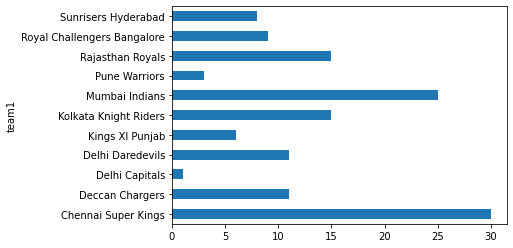

In [16]:
matches[['season','team1','team2','toss_winner','winner']].loc[(matches['team1']==matches['toss_winner']) & (matches['team1']==matches['winner'])].value_counts().groupby('team1').sum().plot(kind='barh')

## TOSS WIN == MATCH WIN

<AxesSubplot:ylabel='team2'>

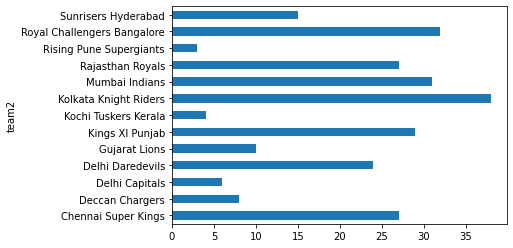

In [15]:
matches[['season','team1','team2','toss_winner','winner']].loc[(matches['team2']==matches['toss_winner']) & (matches['team2']==matches['winner'])].value_counts().groupby('team2').sum().plot(kind='barh')

## TOSS WIN CHOOSE BAT WIN MATCH (1)

<AxesSubplot:ylabel='team1'>

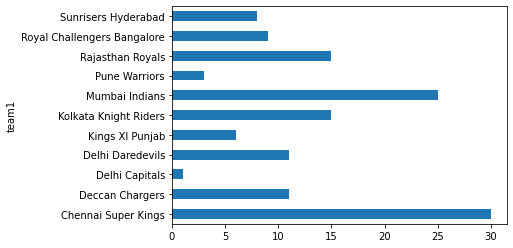

In [17]:
matches[['team1','toss_winner','toss_decision','winner']].loc[(matches['team1']==matches['toss_winner']) & (matches['toss_decision']=='bat') & (matches['team1']==matches['winner'])].value_counts().groupby('team1').sum().plot(kind='barh')

## TOSS WIN CHOOSE BAT WIN MATCH (2)

In [168]:
matches[['team2','toss_winner','toss_decision','winner']].loc[(matches['team2']==matches['toss_winner']) & (matches['toss_decision']=='bat') & (matches['team2']==matches['winner'])].value_counts().groupby('team2').sum()

Series([], dtype: int64)

## TOSS WIN CHOOSE FIELD WIN MATCH (1)

In [169]:
matches[['team1','toss_winner','toss_decision','winner']].loc[(matches['team1']==matches['toss_winner']) & (matches['toss_decision']=='field') & (matches['team1']==matches['winner'])].value_counts().groupby('team1').sum()

Series([], dtype: int64)

## TOSS WIN CHOOSE FIELD WIN MATCH (2)

In [170]:
matches[['team2','toss_winner','toss_decision','winner']].loc[(matches['team2']==matches['toss_winner']) & (matches['toss_decision']=='field') & (matches['team2']==matches['winner'])].value_counts().groupby('team2').sum()

team2
Chennai Super Kings            27
Deccan Chargers                 8
Delhi Capitals                  6
Delhi Daredevils               24
Gujarat Lions                  10
Kings XI Punjab                29
Kochi Tuskers Kerala            4
Kolkata Knight Riders          38
Mumbai Indians                 31
Rajasthan Royals               27
Rising Pune Supergiant          5
Rising Pune Supergiants         3
Royal Challengers Bangalore    32
Sunrisers Hyderabad            15
dtype: int64

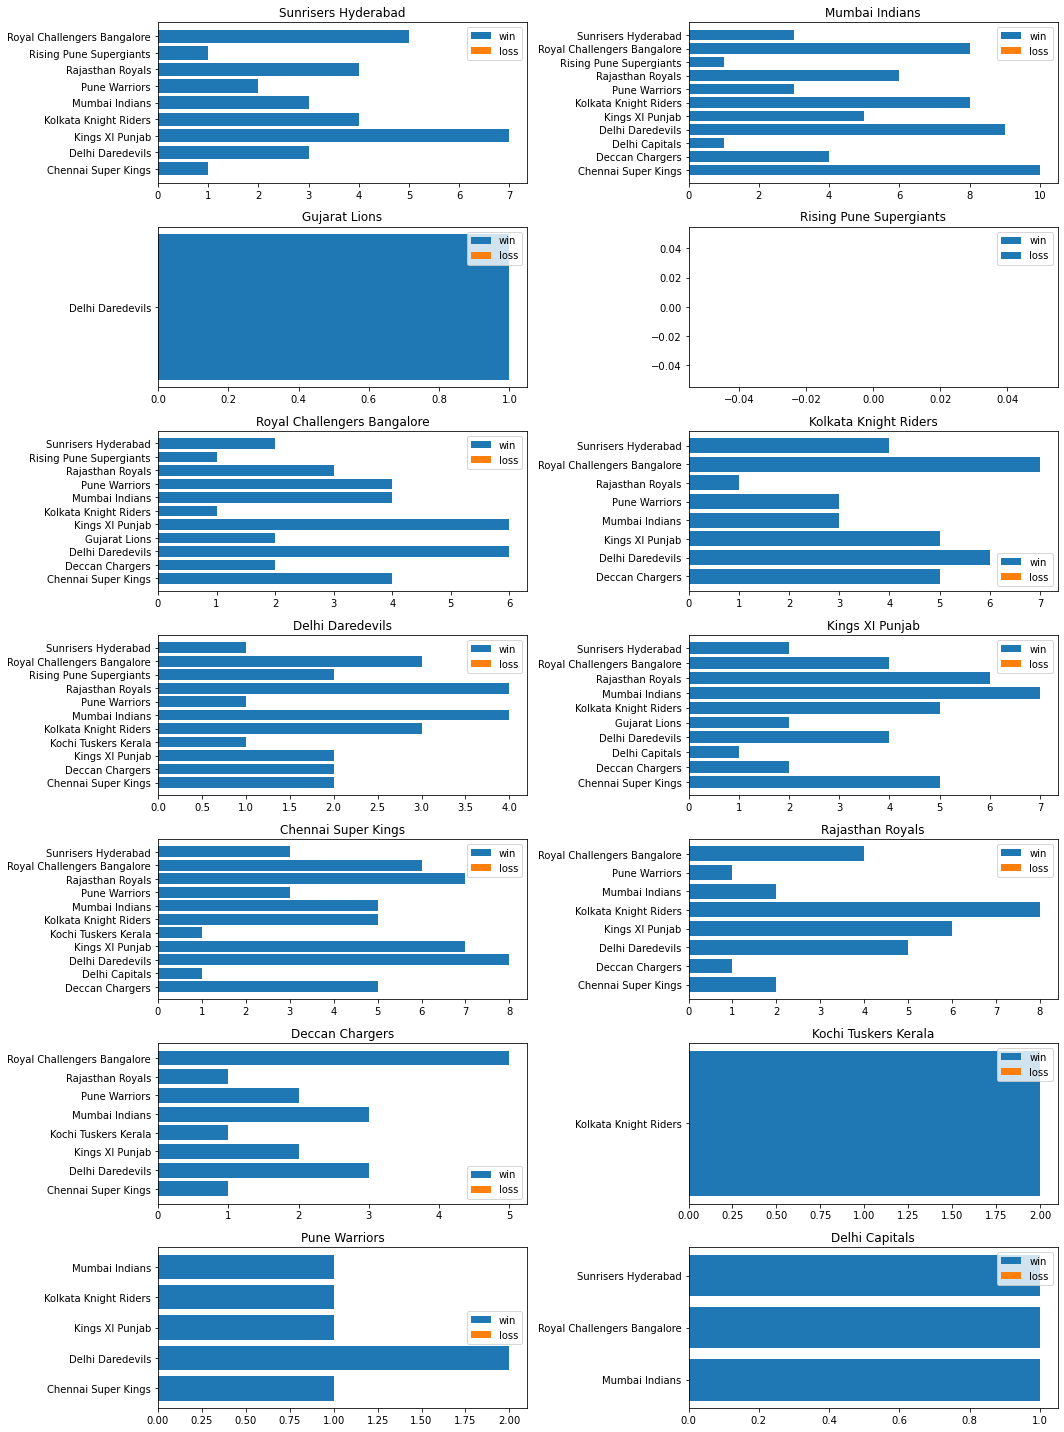

In [372]:
plt.figure(figsize=(15,20))

n , i= round(len(matches.team1.unique())/2), 1
for team in matches.team1.unique():  
    plt.subplot(n, 2, i)
    plt.title("IPL Season: "+ str())    
    plt.tight_layout()
    
    #winMatch = matches[['team1','team2','winner']].loc[(matches.team1==team) & (matches.winner==team)].groupby(['team1','team2']).count()
    #lossMatch = matches[['team1','team2','winner']].loc[(matches.team2==team) & (matches.winner!=team)].groupby(['team1','team2']).count()
    
    winMatch=matches[['team1','team2','winner']].loc[(matches.team1==team) & (matches.winner==team) | (matches.team2==team) & (matches.winner==team)]
    lossMatch=matches[['team1','team2','winner']].loc[(matches.team1==team) & (matches.winner!=team) | (matches.team2==team) & (matches.winner!=team)]

    complete = winMatch.join(lossMatch,lsuffix='_team1',rsuffix='_team2').reset_index()
    plt.title(team)
    plt.barh(complete['team2'],complete['winner_team1'])
    plt.barh(complete['team2'],complete['winner_team2'])
    plt.legend(['win','loss'])
    
    i+=1

In [338]:
round(len(matches.team1.unique())/2)

7

In [242]:
team = 'Kochi Tuskers Kerala'
a=matches[['team1','team2','winner']].loc[(matches.team1==team) & (matches.winner==team) | (matches.team2==team) & (matches.winner==team)]
c=matches[['team1','team2','winner']].loc[(matches.team1==team) & (matches.winner!=team) | (matches.team2==team) & (matches.winner!=team)]
com = pd.concat([a,c])
lete = a.join(c,lsuffix='_team1',rsuffix='_team2').reset_index()
com

team1                        team2  \
246        Mumbai Indians         Kochi Tuskers Kerala   
251   Chennai Super Kings         Kochi Tuskers Kerala   
254  Kochi Tuskers Kerala        Kolkata Knight Riders   
273      Delhi Daredevils         Kochi Tuskers Kerala   
277  Kochi Tuskers Kerala        Kolkata Knight Riders   
293      Rajasthan Royals         Kochi Tuskers Kerala   
236  Kochi Tuskers Kerala  Royal Challengers Bangalore   
243  Kochi Tuskers Kerala                Pune Warriors   
260  Kochi Tuskers Kerala             Rajasthan Royals   
264       Deccan Chargers         Kochi Tuskers Kerala   
268      Delhi Daredevils         Kochi Tuskers Kerala   
282  Kochi Tuskers Kerala  Royal Challengers Bangalore   
289  Kochi Tuskers Kerala              Kings XI Punjab   
296   Chennai Super Kings         Kochi Tuskers Kerala   

                          winner  
246         Kochi Tuskers Kerala  
251         Kochi Tuskers Kerala  
254         Kochi Tuskers Kerala  
273         Kochi Tuskers Kerala  
277         Kochi Tuskers Kerala  
293         Kochi Tuskers Kerala  
236  Royal Challengers Bangalore  
243                Pune Warriors  
260             Rajasthan Royals  
264              Deccan Chargers  
268             Delhi Daredevils  
282  Royal Challengers Bangalore  
289              Kings XI Punjab  
296          Chennai Super Kings

In [245]:
com.groupby(['team1','team2','winner'])['winner'].count()

team1                 team2                        winner                     
Chennai Super Kings   Kochi Tuskers Kerala         Chennai Super Kings            1
                                                   Kochi Tuskers Kerala           1
Deccan Chargers       Kochi Tuskers Kerala         Deccan Chargers                1
Delhi Daredevils      Kochi Tuskers Kerala         Delhi Daredevils               1
                                                   Kochi Tuskers Kerala           1
Kochi Tuskers Kerala  Kings XI Punjab              Kings XI Punjab                1
                      Kolkata Knight Riders        Kochi Tuskers Kerala           2
                      Pune Warriors                Pune Warriors                  1
                      Rajasthan Royals             Rajasthan Royals               1
                      Royal Challengers Bangalore  Royal Challengers Bangalore    2
Mumbai Indians        Kochi Tuskers Kerala         Kochi Tuskers Kerala          

## Venue Where Maximum Matches Ocuurs

In [23]:
matches[['city']].value_counts().head().plot(kind='barh')

<AxesSubplot:ylabel='city'>

In [457]:
winCount=0
lossCount=0
i=0
for x in com.team1:
    if x == com.winner.iloc[i]:
        winCount=1
    else:
        lossCount=1
    print(x,winCount,lossCount,com.winner.iloc[i])          
    winCount=0
    lossCount=0
    i+=1      


Mumbai Indians 0 1 Kochi Tuskers Kerala
Chennai Super Kings 0 1 Kochi Tuskers Kerala
Kochi Tuskers Kerala 1 0 Kochi Tuskers Kerala
Delhi Daredevils 0 1 Kochi Tuskers Kerala
Kochi Tuskers Kerala 1 0 Kochi Tuskers Kerala
Rajasthan Royals 0 1 Kochi Tuskers Kerala
Kochi Tuskers Kerala 0 1 Royal Challengers Bangalore
Kochi Tuskers Kerala 0 1 Pune Warriors
Kochi Tuskers Kerala 0 1 Rajasthan Royals
Deccan Chargers 1 0 Deccan Chargers
Delhi Daredevils 1 0 Delhi Daredevils
Kochi Tuskers Kerala 0 1 Royal Challengers Bangalore
Kochi Tuskers Kerala 0 1 Kings XI Punjab
Chennai Super Kings 1 0 Chennai Super Kings



In [441]:
com.winner.iloc[0]

'Kochi Tuskers Kerala'

In [460]:
com['win']=1

In [487]:
com[['team1','team2','winner','win']].groupby('winner').count()

team1  team2  win
winner                                        
Chennai Super Kings              1      1    1
Deccan Chargers                  1      1    1
Delhi Daredevils                 1      1    1
Kings XI Punjab                  1      1    1
Kochi Tuskers Kerala             6      6    6
Pune Warriors                    1      1    1
Rajasthan Royals                 1      1    1
Royal Challengers Bangalore      2      2    2

In [64]:
plt.figure(figsize=(15,20))
n = round(len(matches.season.unique())/2)
i=1
season = [year for year in matches.season.unique()]

for year1 in sorted(season):  
    plt.subplot(n, 2, i)
    plt.title("IPL Season: "+ str(year1))    
    plt.tight_layout()
    
    matches['player_of_match'].loc[(matches.season==year1)].value_counts().head(10).plot(kind='bar')
    i+=1           

<AxesSubplot:title={'center':'IPL Season: 2019'}>

<AxesSubplot:title={'center':'Most Player of match in ALL IPL Season'}>

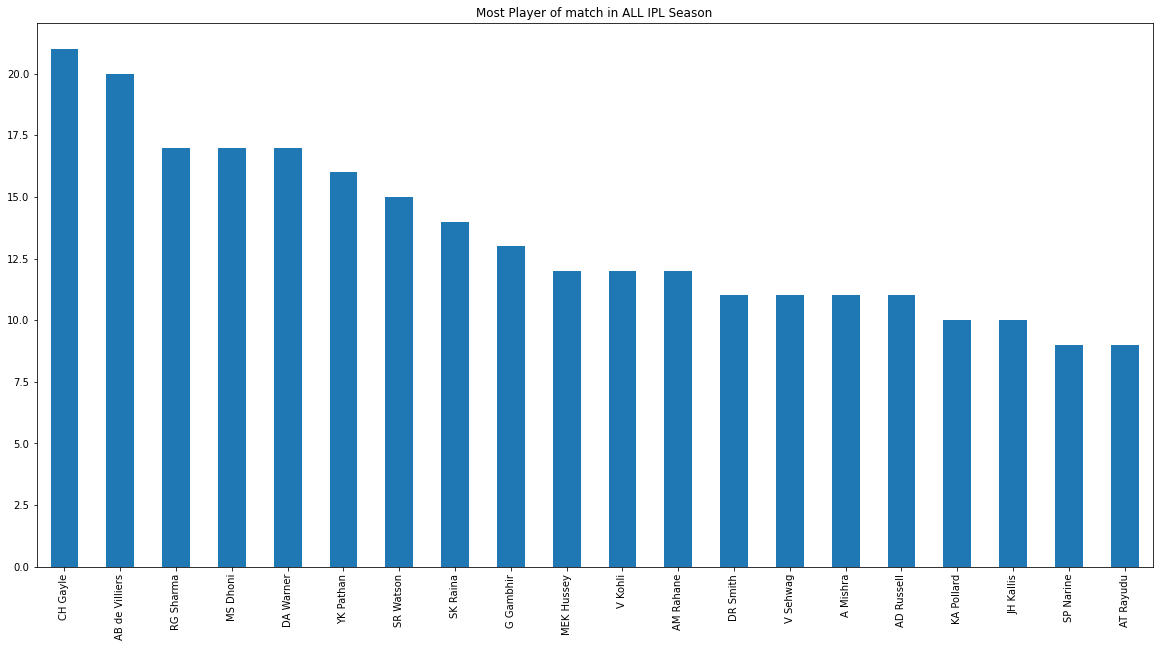

In [68]:
plt.figure(figsize=(20,10))
plt.title("Most Player of match in ALL IPL Season")
matches['player_of_match'].value_counts().head(20).plot(kind='bar') 

In [79]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [84]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [100]:
deliveries.iloc[0]

match_id                                      1
inning                                        1
batting_team                Sunrisers Hyderabad
bowling_team        Royal Challengers Bangalore
over                                          1
ball                                          1
batsman                               DA Warner
non_striker                            S Dhawan
bowler                                 TS Mills
is_super_over                                 0
wide_runs                                     0
bye_runs                                      0
legbye_runs                                   0
noball_runs                                   0
penalty_runs                                  0
batsman_runs                                  0
extra_runs                                    0
total_runs                                    0
player_dismissed                            NaN
dismissal_kind                              NaN
fielder                                 

In [107]:
deliveries.shape

(179078, 21)

In [106]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [111]:
deliveries[pd.notnull(deliveries.fielder)]

match_id  inning                 batting_team  \
11             1       1          Sunrisers Hyderabad   
64             1       1          Sunrisers Hyderabad   
94             1       1          Sunrisers Hyderabad   
165            1       2  Royal Challengers Bangalore   
199            1       2  Royal Challengers Bangalore   
...          ...     ...                          ...   
178977     11415       2          Chennai Super Kings   
179019     11415       2          Chennai Super Kings   
179033     11415       2          Chennai Super Kings   
179067     11415       2          Chennai Super Kings   
179075     11415       2          Chennai Super Kings   

                       bowling_team  over  ball       batsman   non_striker  \
11      Royal Challengers Bangalore     2     5     DA Warner      S Dhawan   
64      Royal Challengers Bangalore    11     3      S Dhawan  MC Henriques   
94      Royal Challengers Bangalore    16     2  MC Henriques  Yuvraj Singh   
165             Sunrisers Hyderabad     7     3      CH Gayle       TM Head   
199             Sunrisers Hyderabad    12     4     KM Jadhav       TM Head   
...                             ...   ...   ...           ...           ...   
178977               Mumbai Indians     4     6  F du Plessis     SR Watson   
179019               Mumbai Indians    11     3     AT Rayudu     SR Watson   
179033               Mumbai Indians    13     5     SR Watson      MS Dhoni   
179067               Mumbai Indians    19     2      DJ Bravo     SR Watson   
179075               Mumbai Indians    20     4     SR Watson     RA Jadeja   

              bowler  is_super_over  ...  bye_runs  legbye_runs  noball_runs  \
11       A Choudhary              0  ...         0            0            0   
64         STR Binny              0  ...         0            0            0   
94         YS Chahal              0  ...         0            0            0   
165         DJ Hooda              0  ...         0            0            0   
199     MC Henriques              0  ...         0            0            0   
...              ...            ...  ...       ...          ...          ...   
178977     KH Pandya              0  ...         0            0            0   
179019     JJ Bumrah              0  ...         0            0            0   
179033     HH Pandya              0  ...         0            0            0   
179067     JJ Bumrah              0  ...         0            0            0   
179075    SL Malinga              0  ...         0            0            0   

        penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
11                 0             0           0           0         DA Warner   
64                 0             0           0           0          S Dhawan   
94                 0             0           0           0      MC Henriques   
165                0             0           0           0          CH Gayle   
199                0             1           0           1         KM Jadhav   
...              ...           ...         ...         ...               ...   
178977             0             0           0           0      F du Plessis   
179019             0             0           0           0         AT Rayudu   
179033             0             1           0           1          MS Dhoni   
179067             0             0           0           0          DJ Bravo   
179075             0             1           0           1         SR Watson   

       dismissal_kind        fielder  
11             caught  Mandeep Singh  
64             caught    Sachin Baby  
94             caught    Sachin Baby  
165            caught      DA Warner  
199           run out    BCJ Cutting  
...               ...            ...  
178977        stumped      Q de Kock  
179019         caught      Q de Kock  
179033        run out   Ishan Kishan  
179067         caught      Q de Kock  
179075        run out  

In [122]:
deliveries[['batsman','batsman_runs']].groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Total Runs Scored", size = 15)

Text(0, 0.5, 'Total Runs Scored')

## Which bowlers have performed the best?

Text(0, 0.5, 'Total Wickets Taken')

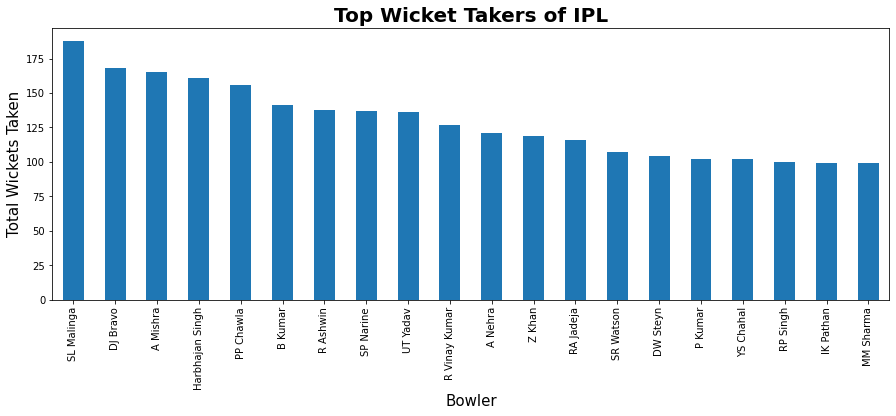

In [119]:
deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(20).plot(kind='bar',figsize=(15,5))

plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 15)
plt.ylabel("Total Wickets Taken", size = 15)

#merge.groupby('bowler')['player_dismissed'].count()

## Reason of Played Dissmissed in Season

<AxesSubplot:xlabel='dismissal_kind'>

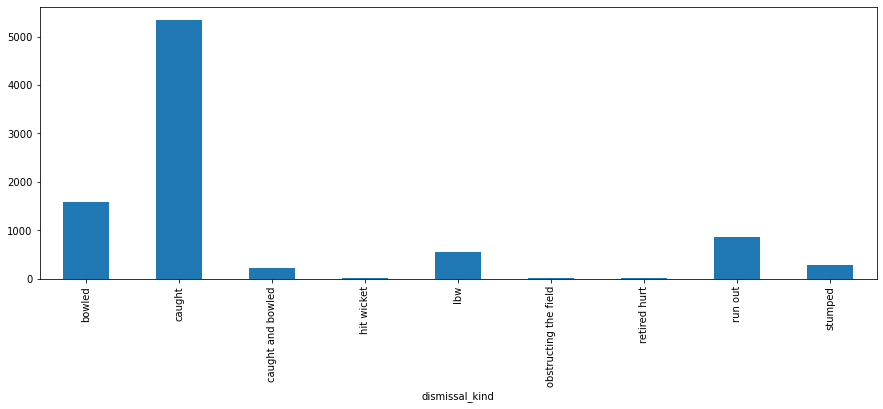

In [142]:
deliveries.groupby('dismissal_kind')['player_dismissed'].count().plot(kind='bar',figsize=(15,5))
#plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
#plt.xlabel("Bowler", size = 15)
#plt.ylabel("Total Wickets Taken" size = 15)

## Dismissed Style of Player

Text(0, 0.5, 'Total')

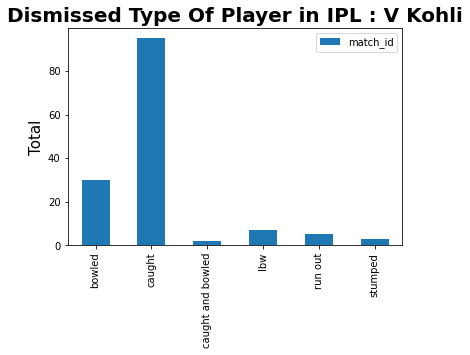

In [172]:
#deliveries.loc[(deliveries.batsman=='V Kohli') & (deliveries.player_dismissed=='V Kohli')].groupby(['player_dismissed','dismissal_kind'])['dismissal_kind'].count().plot(kind='bar')
deliveries.loc[(deliveries.batsman=='V Kohli') & (deliveries.player_dismissed=='V Kohli')].groupby(['player_dismissed','dismissal_kind']).count().reset_index().plot(kind='bar',x='dismissal_kind',y='match_id')
plt.title("Dismissed Type Of Player in IPL : V Kohli", fontsize = 20, fontweight = 'bold')
plt.xlabel('')
plt.ylabel("Total", size = 15)

## Run Score Style of Player

batsman_runs
1    1741
2     586
3      33
4    1928
6    1146
Name: batsman_runs, dtype: int64


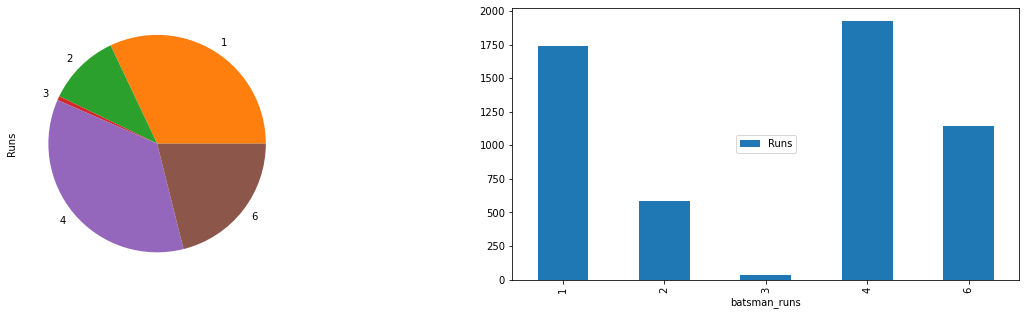

In [233]:
vKholi = deliveries[['batsman_runs']].loc[(deliveries.batsman=='V Kohli')].groupby('batsman_runs')['batsman_runs'].sum()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
vKholi.plot(kind='pie',label='Runs')
plt.subplot(1,2,2)
vKholi.iloc[1:].plot(kind='bar',label='Runs')
plt.legend(loc='center')
print(vKholi.iloc[1:])


# Now, We will merge the 2 datasets for better insights from the data

In [130]:
matchesId = matches.rename_axis('id').reset_index()

In [132]:
merge = pd.merge(deliveries,matchesId, left_on='match_id', right_on ='id')
merge.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  toss_decision  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...          field   
1     2  DA Warner    S Dhawan  TS Mills              0  ...          field   
2     3  DA Warner    S Dhawan  TS Mills              0  ...          field   
3     4  DA Warner    S Dhawan  TS Mills              0  ...          field   
4     5  DA Warner    S Dhawan  TS Mills              0  ...          field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0  Rising Pune Supergiant            0               7   
1  normal           0  Rising Pune Supergiant            0               7   
2  normal           0  Rising Pune Supergiant            0               7   
3  normal           0  Rising Pune Supergiant            0               7   
4  normal           0  Rising Pune Supergiant            0               7   

   player_of_match                                    venue         umpire1  \
0        SPD Smith  Maharashtra Cricket Association Stadium  A Nand Kishore   
1        SPD Smith  Maharashtra Cricket Association Stadium  A Nand Kishore   
2        SPD Smith  Maharashtra Cricket Association Stadium  A Nand Kishore   
3        SPD Smith  Maharashtra Cricket Association Stadium  A Nand Kishore   
4        SPD Smith  Maharashtra Cricket Association Stadium  A Nand Kishore   

  umpire2  
0  S Ravi  
1  S Ravi  
2  S Ravi  
3  S Ravi  
4  S Ravi  

[5 rows x 38 columns]

Text(0, 0.5, 'Strike Rate')

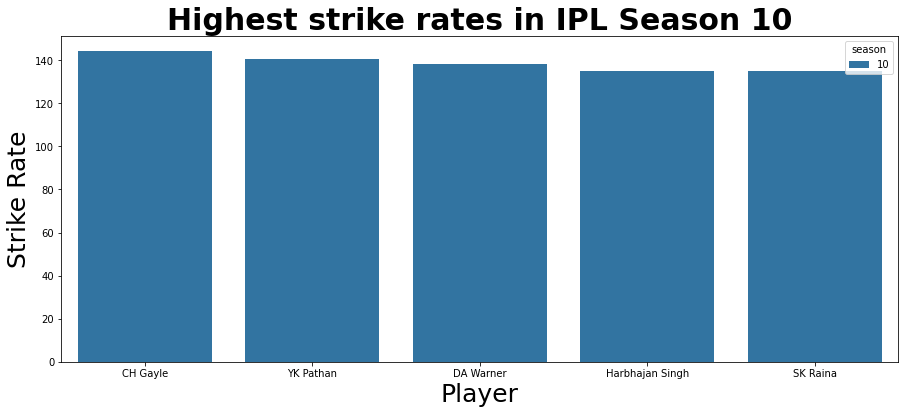

In [268]:
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(), hue = 'season')
plt.title("Highest strike rates in IPL Season 10",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)


Text(0, 0.5, 'Strike Rate')

<Figure size 1080x432 with 0 Axes>

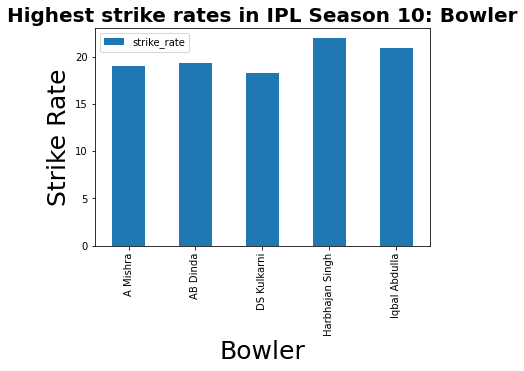

In [272]:
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
plt.figure(figsize = (15,6))
bowler_strike_rate[bowler_strike_rate.season.isin([10])].head().plot(kind='bar',x='bowler',y='strike_rate')
plt.title("Highest strike rates in IPL Season 10: Bowler",fontsize= 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Strike Rate", size = 25)

##  As a sports analysts, The most successful teams, players & factors contributing win or loss of a team

> Mumbai Indians is the most successful team in IPL and has won the most number of toss.
- There were more matches won by chasing the total(419 matches) than defending(350 matches).
> Mumbai Indians Win Maximum No. of **Four Season Champion Title**.
- When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.
- The Mumbai city has hosted the most number of IPL matches.


> Chris Gayle has won the maximum number of player of the match title.

> Eden Gardens has hosted the maximum number of IPL Finals.

> If a team wins a toss choose to field first as it has highest probablity of winning

##  Suggest teams or players a company should endorse for its products. 


> If the franchise is looking for a consistant batsman who needs to score good amount of runs then go for V Kohli, S Raina, Rohit Sharma , David Warner...

> If the franchise need a wicket taking bowler then go for A Mishra ,Harbhajan Singh, Iqbal Abdulla..